# Pythoch

https://pytorch.org/

In [2]:
# !pip3 install torch torchvision torchaudio

^C


In [1]:
import torch

## ¿ Qué es Pytorch ?

`Pytorch` es un framework de `redes neuronales`, un conjunto de librerías y herramientas que nos hacen la vida más fácil a la hora de diseñar, entrenar y poner en producción nuestros modelos de `Deep Learning`. Una forma sencilla de entender qué es `Pytorch` es la siguiente:

$$ Pytorch = Numpy + Autograd + GPU $$

Vamos a ver qué significa cada uno de estos términos.

De la misma manera que en `NumPy` el objeto principal es el `ndarray`, en `Pytorch` el objeto principal es el `tensor`. Podemos definir un tensor de manera similar a como definimos un array, incluso podemos inicializar tensores a partir de arrays.

In [2]:
x = torch.zeros(5, 3)
x

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])

In [3]:
print(dir(torch))

['AVG', 'AggregationType', 'AliasDb', 'AnyType', 'Argument', 'ArgumentSpec', 'BFloat16Storage', 'BFloat16Tensor', 'BenchmarkConfig', 'BenchmarkExecutionStats', 'Block', 'BoolStorage', 'BoolTensor', 'BoolType', 'BufferDict', 'ByteStorage', 'ByteTensor', 'CONV_BN_FUSION', 'CallStack', 'Callable', 'Capsule', 'CharStorage', 'CharTensor', 'ClassType', 'Code', 'CompilationUnit', 'CompleteArgumentSpec', 'ComplexDoubleStorage', 'ComplexFloatStorage', 'ComplexType', 'ConcreteModuleType', 'ConcreteModuleTypeBuilder', 'DeepCopyMemoTable', 'DeserializationStorageContext', 'DeviceObjType', 'DictType', 'DisableTorchFunction', 'DoubleStorage', 'DoubleTensor', 'EnumType', 'ErrorReport', 'ExecutionPlan', 'FUSE_ADD_RELU', 'FatalError', 'FileCheck', 'FloatStorage', 'FloatTensor', 'FloatType', 'FunctionSchema', 'Future', 'FutureType', 'Generator', 'Gradient', 'Graph', 'GraphExecutorState', 'HOIST_CONV_PACKED_PARAMS', 'HalfStorage', 'HalfTensor', 'INSERT_FOLD_PREPACK_OPS', 'IODescriptor', 'InferredType', '

In [3]:
# tensor con valores aleatorios

x = torch.randn(5, 3, 2)
x

tensor([[[-1.2595e+00,  1.9541e-02],
         [ 7.1350e-01,  1.1967e+00],
         [-1.3827e+00, -6.5802e-01]],

        [[ 9.4521e-01, -3.3716e-01],
         [ 1.1168e+00,  1.0718e+00],
         [-8.6777e-01, -1.1627e+00]],

        [[ 2.5564e-01, -1.7753e-01],
         [ 1.1383e+00, -5.1117e-01],
         [-6.2367e-01, -9.7866e-01]],

        [[-1.4592e+00,  6.6930e-01],
         [ 8.0632e-01, -6.4345e-01],
         [-3.5916e-01, -2.2746e+00]],

        [[ 1.8021e-03,  1.3799e+00],
         [ 5.5926e-01, -7.1851e-01],
         [ 2.0780e-01,  6.0835e-01]]])

In [4]:
# tensor a partir de lista 

x = torch.tensor([[1, 2, 3],[4, 5, 6]])
x

tensor([[1, 2, 3],
        [4, 5, 6]])

In [4]:
import numpy as np


In [5]:

# tensor a partir de array

a = np.array([[1, 2, 3],[4, 5, 6]])
print(a)


[[1 2 3]
 [4 5 6]]


In [6]:
x = torch.from_numpy(a)
x

tensor([[1, 2, 3],
        [4, 5, 6]], dtype=torch.int32)

In [54]:
# operaciones

x = torch.randn(3, 3)
y = torch.randn(3, 3)

x, y

(tensor([[ 0.5883, -1.0804, -0.8015],
         [ 0.2218, -0.6120,  0.7500],
         [-0.5477, -1.0424, -0.3481]]),
 tensor([[-0.7714, -0.4384,  0.3883],
         [-0.8220, -0.9708, -0.6076],
         [-0.0985, -0.7322,  0.2331]]))

In [10]:
x + y

tensor([[-0.7147, -1.3274, -0.4424],
        [-0.7477,  0.5887,  0.9119],
        [ 2.1903,  0.6172, -1.0388]])

In [12]:
x - y

tensor([[-0.1858,  1.6582,  0.9126],
        [-0.5220,  1.2586, -0.5488],
        [ 0.3748, -2.0054, -1.9503]])

In [13]:
x  * y

tensor([[ 0.1191, -0.2469, -0.1593],
        [ 0.0716, -0.3094,  0.1326],
        [ 1.1642, -0.9102, -0.6811]])

In [14]:
x[0]

tensor([-0.4503,  0.1654,  0.2351])

In [16]:
x.shape

torch.Size([3, 3])

In [40]:
z = torch.rand(3,1
               )

In [41]:
z

tensor([[0.3099],
        [0.3327],
        [0.5785]])

In [42]:
x

tensor([[-0.4503,  0.1654,  0.2351],
        [-0.6348,  0.9236,  0.1815],
        [ 1.2825, -0.6941, -1.4945]])

# multiplicacion de punto o dot con pytorch

In [43]:
torch.mm(x,z)

tensor([[ 0.0515],
        [ 0.2156],
        [-0.6980]])

In [44]:
tensor_example_one = torch.Tensor(
[
    [1, 1, 1],
    [2, 2, 2],
    [3, 3, 3]
])

In [46]:
tensor_example_two = torch.Tensor(
[
    [4, 5, 6],
    [4, 5, 6],
    [4, 5, 6]
])

In [47]:
tensor_dot_product = torch.mm(tensor_example_one, tensor_example_two)

In [48]:
print(tensor_dot_product)

tensor([[12., 15., 18.],
        [24., 30., 36.],
        [36., 45., 54.]])


## Autograd
Ya hemos visto que Pytorch es muy similar a NumPy, sin embargo su funcionalidad va más allá de una estructura de datos eficiente con la que podemos llevar a cabo operaciones (para eso ya nos basta con NumPy). La funcionalidad más importante que Pytorch añade es la conocidad como autograd, la cual nos proporciona la posibilidad de calcular derivadas de manera automática con respecto a cualquier tensor. Esto le da a Pytorch un gran potencial para diseñar redes neuronales complejas y entrenarlas utilizando algoritmos de gradientes sin tener que calcular todas estas derivadas manualmente (como hemos hecho en los posts anteriores). Para poder llevar a cabo estas operaciones, Pytorch va construyendo de manera dinámica un grafo computacional. Cada vez que aplicamos una operación sobre uno o varios tensores, éstos se añaden al grafo computacional junto a la operación en concreto. De esta manera, si queremos calcular la derivada de cualquier valor con respecto a cualquier tensor, simplemente tenemos que aplicar el algoritmo de backpropagation (que no es más que la regla de la cadena de la derivada) en el grafo. Vamos a ilustrarlo con un ejemplo.

In [51]:
x = torch.tensor(1., requires_grad=True)
y = torch.tensor(2., requires_grad=True)
p = x + y
p

tensor(3., grad_fn=<AddBackward0>)

In [86]:
x = torch.tensor(2., requires_grad=True)
y = torch.tensor(2., requires_grad=True)
# p = torch.tensor (x + y,requires_grad=True) 
p = x + y
p

tensor(4., grad_fn=<AddBackward0>)

In [87]:

z = torch.tensor(3., requires_grad=True)
g = p * z
g

tensor(12., grad_fn=<MulBackward0>)

In [88]:
g.backward()

In [89]:
z.grad

tensor(4.)

In [90]:
y.grad

tensor(3.)

In [91]:
x.grad

tensor(3.)

In [92]:
# p.grad

C:\Users\Usuario\AppData\Roaming\Python\Python310\site-packages\torch\_tensor.py:1083: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at  aten\src\ATen/core/TensorBody.h:482.)
  return self._grad


In [93]:
x = torch.randn(3, 3, requires_grad=True)
y = torch.randn(3, 3, requires_grad=True)

In [95]:
g1 = x * y

In [96]:
g1

tensor([[-0.0864, -0.0231,  0.0832],
        [ 0.7820,  0.1175, -1.4533],
        [-0.3338,  0.0925,  0.2853]], grad_fn=<MulBackward0>)

In [98]:
torch.cuda.is_available()

False

In [120]:
import sklearn 

In [121]:
sklearn .__version__

'1.0.2'

In [99]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1)
X, Y = mnist["data"], mnist["target"]

X.shape, Y.shape

((70000, 784), (70000,))

In [124]:
Y[0]

'5'

In [119]:
type(X)

pandas.core.frame.DataFrame

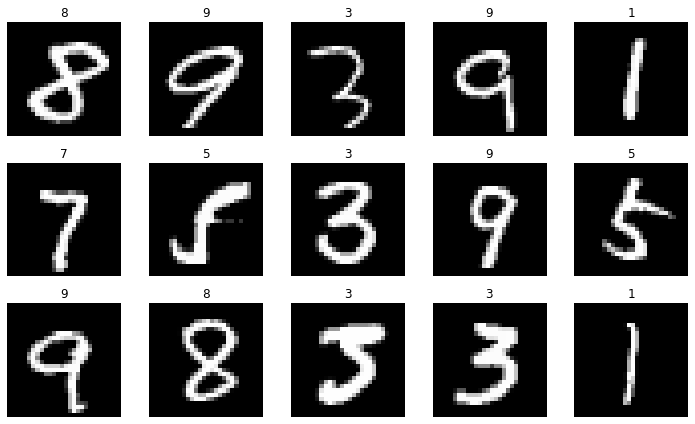

In [122]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import random 

r, c = 3, 5
fig = plt.figure(figsize=(2*c, 2*r))
for _r in range(r):
    for _c in range(c):
        plt.subplot(r, c, _r*c + _c + 1)
        ix  = random.randint(0, len(X)-1)
        # img = X[ix]  # para versiones de dataset de sklearn inferiores a 1.0
        img = X.iloc[ix].values
        plt.imshow(img.reshape(28,28), cmap='gray')
        plt.axis("off")
        plt.title(Y[ix])
plt.tight_layout()
plt.show()

In [117]:
X_train, X_test, y_train, y_test = X[:60000] / 255., X[60000:] / 255., Y[:60000].astype("int"), Y[60000:].astype("int")

In [ ]:
# función de pérdida y derivada

def softmax(x):
    return torch.exp(x) / torch.exp(x).sum(axis=-1,keepdims=True)

def cross_entropy(output, target):
    logits = output[torch.arange(len(output)), target]
    loss = - logits + torch.log(torch.sum(torch.exp(output), axis=-1))
    loss = loss.mean()
    return loss

In [142]:
mat1 = torch.tensor([[1,2],[4,5],[3,3]])
print(mat1)

print(mat1.sum(axis=0))
print(mat1.sum(axis=1))
print(mat1.sum(axis=-1))

tensor([[1, 2],
        [4, 5],
        [3, 3]])
tensor([ 8, 10])
tensor([3, 9, 6])
tensor([3, 9, 6])


In [143]:
mat1 = torch.tensor([[[1,2],[4,5],[3,6]]])
print(mat1)

print(mat1.sum(axis=0))
print(mat1.sum(axis=1))
print(mat1.sum(axis=-1))

tensor([[[1, 2],
         [4, 5],
         [3, 6]]])
tensor([[1, 2],
        [4, 5],
        [3, 6]])
tensor([[ 8, 13]])
tensor([[3, 9, 9]])


In [127]:
exp_x=torch.exp(x)